## PREPARING THE DATA

In [16]:
# =========== IMPORT UTILS ===========
from utils.utils import *
import pickle

In [25]:

# Load dataset and sequance list

def load_p(path):
    with open(path, 'rb') as file:
        df_ = pickle.load(file)
    return(df_)

X_train=load_p("fitted_models/X_train.pkl")
y_train=load_p("fitted_models/y_train.pkl")

X_test=load_p("fitted_models/X_test.pkl")
y_test=load_p("fitted_models/y_test.pkl")

X_tiny=load_p("fitted_models/X_tiny.pkl")
y_tiny=load_p("fitted_models/y_tiny.pkl")

with open("fitted_models/sequence_list.pkl", "rb") as file:
    # Load the pickled object
    sequence_list = pickle.load(file)



In [26]:
# =========== CREATE DICTIONARIES WITH UNIQUE INDEX  ===========

# To store values efficiently (INTEGERS/WORDS and INTEGERS/TAGS)
# x attribute: list of words (integer words)
# y attribute: list of tags (integer tags)
# Then we need to keep a mapping from integers to words and from integers to tags.

word_dict, tag_dict = create_corpus(X_train, y_train)

In [28]:
# =========== CREATE TAGS  ===========

train_tag_pos = [[tag_dict[i] for i in tag] for tag in y_train]
y_train_true = [tag for array in train_tag_pos for tag in array]

test_tag_pos = [[tag_dict[i] for i in tag] for tag in y_test]
y_test_true = [tag for array in test_tag_pos for tag in array]

tiny_tag_pos = [[tag_dict[i] for i in tag] for tag in y_tiny]
y_tiny_true = [tag for array in tiny_tag_pos for tag in array]

## MODELS

In [29]:
# =========== MODELS IMPORT  ===========
structured_perceptron = StructuredPerceptron(word_dict, tag_dict, feature_mapper)
structured_perceptron.load_model(dir='fitted_models/default_features_model_wo_cython')
structured_perceptron.parameters

# =========== MODELS - Default Features ===========
feature_mapper = IDFeatures(sequence_list)
feature_mapper.build_features()


Predicting tags: 100%|██████████| 38367/38367 [06:06<00:00, 104.69sequence/s]


0.8231954867583049
0.8675936508391464


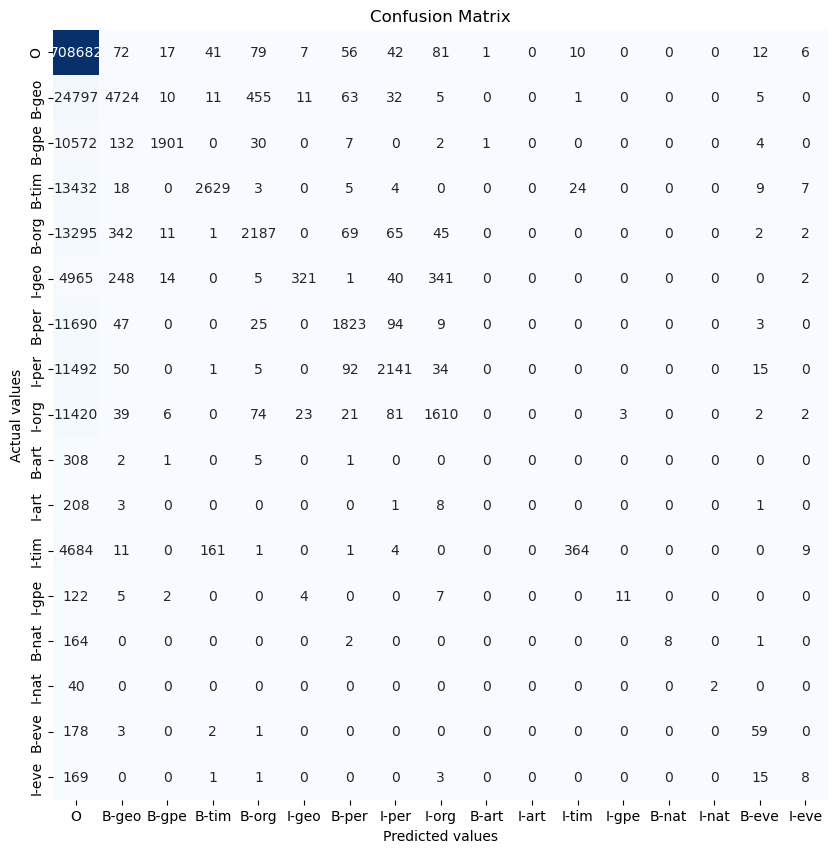

In [36]:
evaluate(X_test,structured_perceptron,y_test_true,tag_dict)

In [37]:
evaluate(X_tiny,structured_perceptron,y_tiny_true,tag_dict)

TypeError: evaluate() takes 2 positional arguments but 4 were given

In [ ]:
from skseq.sequences import extended_feature
import skseq.sequences.structured_perceptron as spc

extra_mapping_feature = extended_feature.ExtendedFeatures(sequence_list) 
extra_mapping_feature.build_features()

structured_perceptron_extraf = spc.StructuredPerceptron(word_dict, tag_dict, extra_mapping_feature)
structured_perceptron_extraf.load_model(dir='fitted_models/extra_features_model_wo_cython')

In [ ]:
evaluate(X_test,structured_perceptron_extraf,y_test_true,tag_dict)

In [ ]:
evaluate(X_tiny,structured_perceptron_extraf,y_tiny_true,tag_dict)